## Churn_Modelling_Preduction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [5]:
data.shape

(10000, 14)

In [6]:
X = data.iloc[:, 3:13]
y = data.iloc[:,-1]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
X = pd.concat([X,geography,gender],axis=1)

In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
X = X.drop(["Geography","Gender"],axis = 1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
import tensorflow as tf
print(tf.__version__)


2.3.0


In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [19]:
classifier = Sequential()

In [20]:
X.shape

(10000, 11)

In [21]:
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(6,kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [22]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs= 100)

Epoch 1/100
469/469 [==============================] - 1s 3ms/step - loss: 0.6454 - accuracy: 0.6315 - val_loss: 0.5201 - val_accuracy: 0.7663
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4882 - accuracy: 0.7961 - val_loss: 0.4896 - val_accuracy: 0.7932
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4748 - accuracy: 0.7987 - val_loss: 0.4839 - val_accuracy: 0.7958
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4687 - accuracy: 0.7985 - val_loss: 0.4788 - val_accuracy: 0.7953
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4634 - accuracy: 0.7987 - val_loss: 0.4746 - val_accuracy: 0.7949
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4588 - accuracy: 0.7987 - val_loss: 0.4709 - val_accuracy: 0.7953
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4547 - accuracy: 0.7991 - val_loss: 0.4678 - val_accuracy: 0.7949

Epoch 58/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3563 - accuracy: 0.8454 - val_loss: 0.3821 - val_accuracy: 0.8338
Epoch 59/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.8443 - val_loss: 0.3819 - val_accuracy: 0.8351
Epoch 60/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3554 - accuracy: 0.8452 - val_loss: 0.3816 - val_accuracy: 0.8347
Epoch 61/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3550 - accuracy: 0.8454 - val_loss: 0.3814 - val_accuracy: 0.8364
Epoch 62/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3545 - accuracy: 0.8458 - val_loss: 0.3813 - val_accuracy: 0.8369
Epoch 63/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3541 - accuracy: 0.8469 - val_loss: 0.3815 - val_accuracy: 0.8386
Epoch 64/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3539 - accuracy: 0.8460 - val_loss: 0.3809 - val_accuracy:

In [24]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


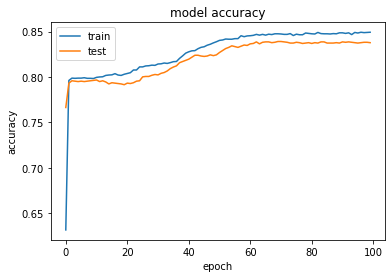

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

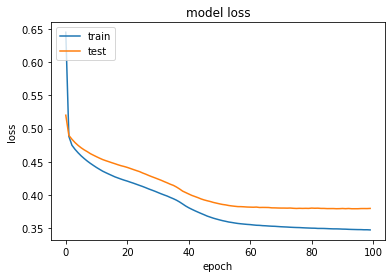

In [32]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [38]:
cm

array([[2225,  154],
       [ 337,  284]], dtype=int64)

In [44]:
print(f"the accuracy of y_pred is : {score} ")

the accuracy of y_pred is : 0.8363333333333334 


## The end!